## Data Exploration
### Loading the required libs

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load data from multiple CSV files in a directory
directory_path = "/content/drive/MyDrive/Colab Notebooks/Training"
all_files = [f for f in os.listdir(directory_path) if f.endswith(".csv")]

# Assuming your CSV files have similar structure, adjust this part accordingly
df_list = []
for file in all_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into one
merged_df = pd.concat(df_list, ignore_index=True)

# # Step 2: Drop  specified columns
columns_to_drop = ['instance_id','track_id','time_signature']
merged_df = merged_df.drop(columns=columns_to_drop)

#### Convert colum to lowercase and remove spaces

In [5]:
merged_df.columns= merged_df.columns.str.replace(" ","_").str.lower()
print("Column names after conversion = ", merged_df.columns)

Column names after conversion =  Index(['artist_name', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'genre'],
      dtype='object')


In [6]:
# Check for values with less than 1 ms in the duration
merged_df.loc[(merged_df['duration_ms'] < 1)]['duration_ms']

0       -1
4       -1
7       -1
10      -1
16      -1
        ..
49222   -1
49224   -1
49226   -1
49236   -1
49245   -1
Name: duration_ms, Length: 9877, dtype: int64

In [7]:
# Count the number of the less than 1 ms in the duration
condition = merged_df['duration_ms'] < 1
condition.value_counts()

False    39369
True      9877
Name: duration_ms, dtype: int64

In [8]:
# Multiply them by -60000(ms) to convert to ms
merged_df.loc[condition,'duration_ms'] = merged_df.loc[condition,'duration_ms']*(-60000)

In [9]:
# New check
condition = merged_df['duration_ms'] < 5
condition.value_counts()

False    49246
Name: duration_ms, dtype: int64

Check for Null values

In [10]:
nan_col = merged_df.columns[merged_df.isnull().any()]
for i in nan_col:
    print(i, merged_df[i].isnull().sum())
else:
  print("No null values ")

No null values 


In [11]:
# Replace '?' with NaN in the tempo column
merged_df['tempo'] = merged_df['tempo'].replace('?', pd.NA)
# Convert the column to a numeric type
merged_df['tempo'] = pd.to_numeric(merged_df['tempo'], errors='coerce')

In [12]:
# confirm the Na values
nan_col = merged_df.columns[merged_df.isnull().any()]
for i in nan_col:
    print(i, merged_df[i].isnull().sum())
else:
  print("No null values ")

tempo 6707
No null values 


In [13]:
## Imputing null values in "tempo" columns with the median value of respective columns
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
merged_df[['tempo']] = imp.fit_transform(merged_df[['tempo']])

In [14]:
# Confirm they are gone
nan_col = merged_df.columns[merged_df.isnull().any()]
for i in nan_col:
    print(i, merged_df[i].isnull().sum())
else:
  print("No null values ")

No null values 


### Checking the skeewness of the data

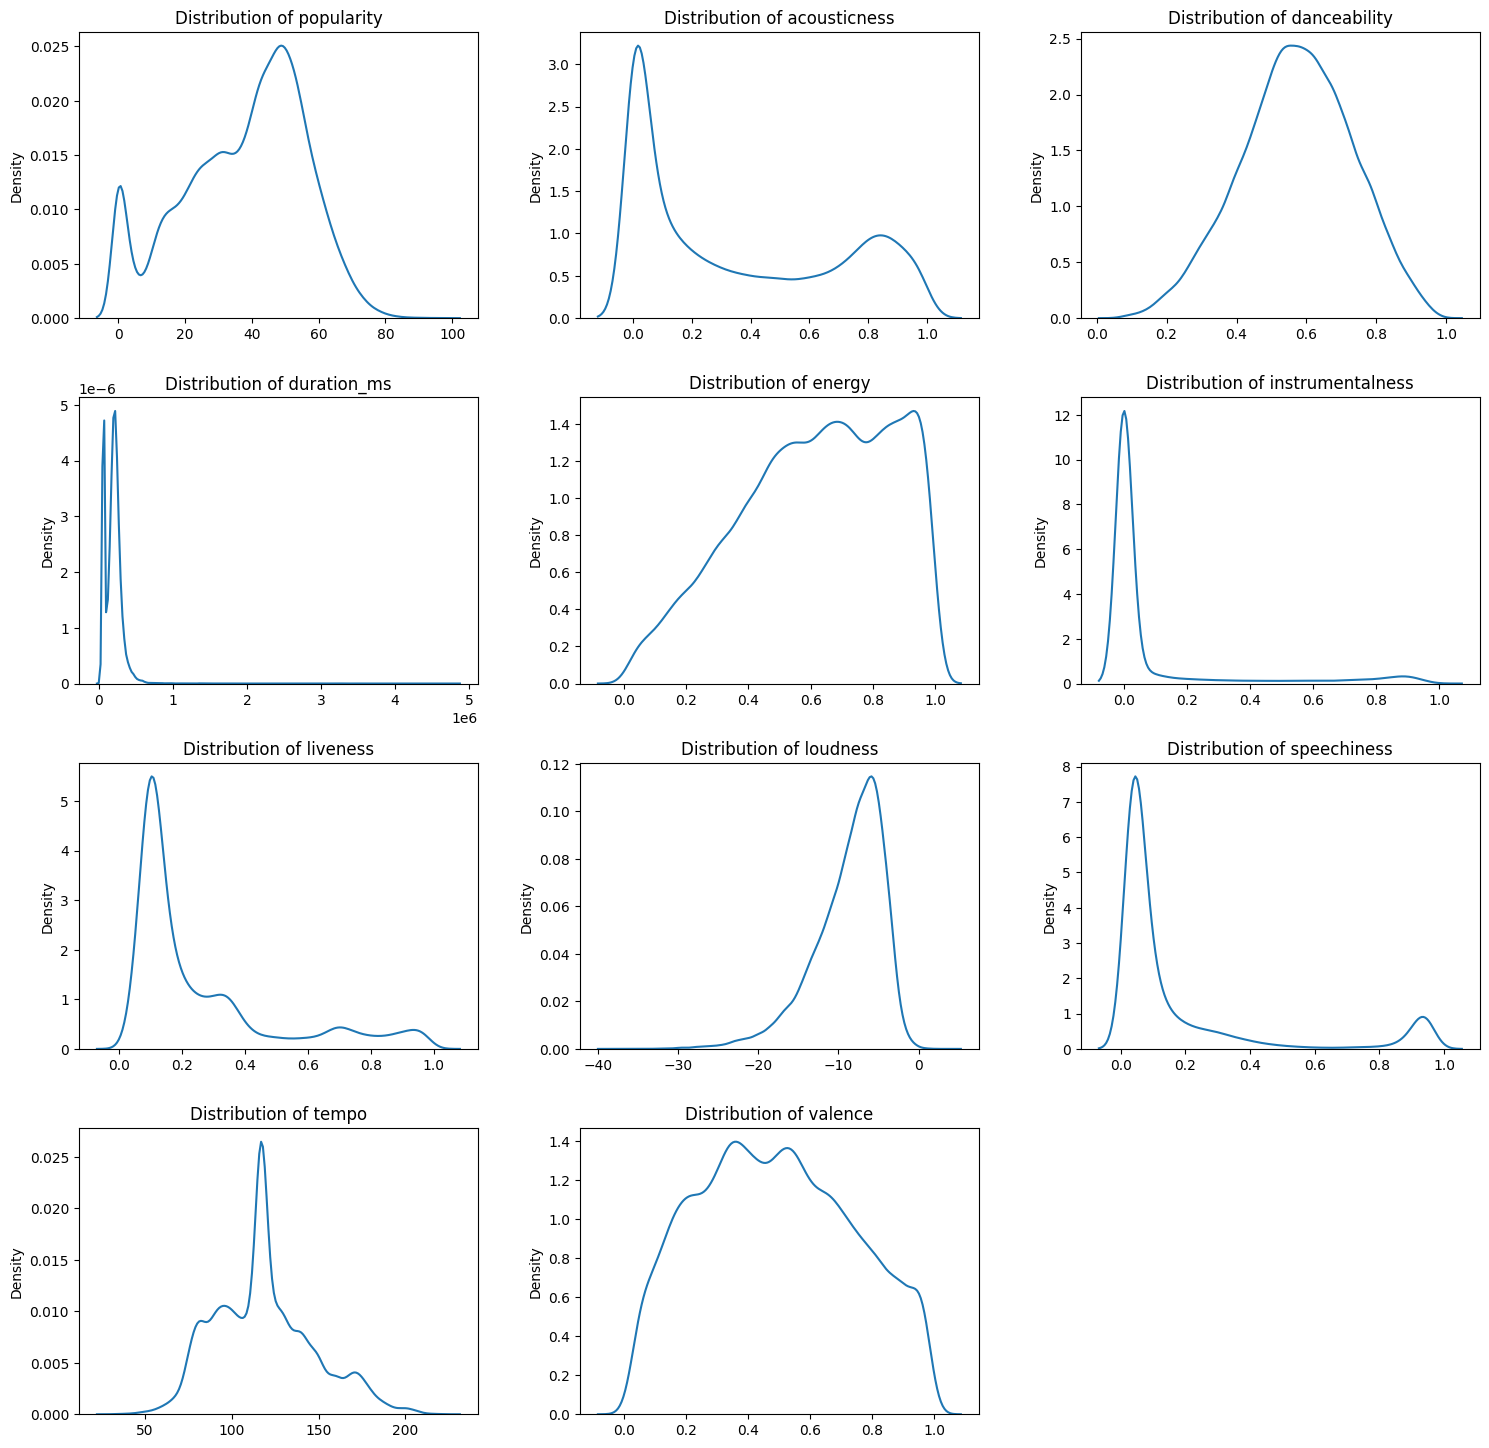

In [15]:
df_cont = merged_df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(15, 18)) # sets the size of the plot with width as 15 and height as 18
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.kdeplot(x=df_cont[columns]) # creates kde plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

In [16]:
for i in df_cont.columns:
  print(f'Skewness in {i} =',df_cont[i].skew())

Skewness in popularity = -0.38013707896910826
Skewness in acousticness = 0.49416923089837317
Skewness in danceability = -0.15352663859195875
Skewness in duration_ms = 9.029999787176509
Skewness in energy = -0.3693036250006611
Skewness in instrumentalness = 2.677549720199203
Skewness in liveness = 1.589621236041414
Skewness in loudness = -1.19520828868846
Skewness in speechiness = 2.210879838212257
Skewness in tempo = 0.45350691289271494
Skewness in valence = 0.1295788819956804


### Checking for outliers

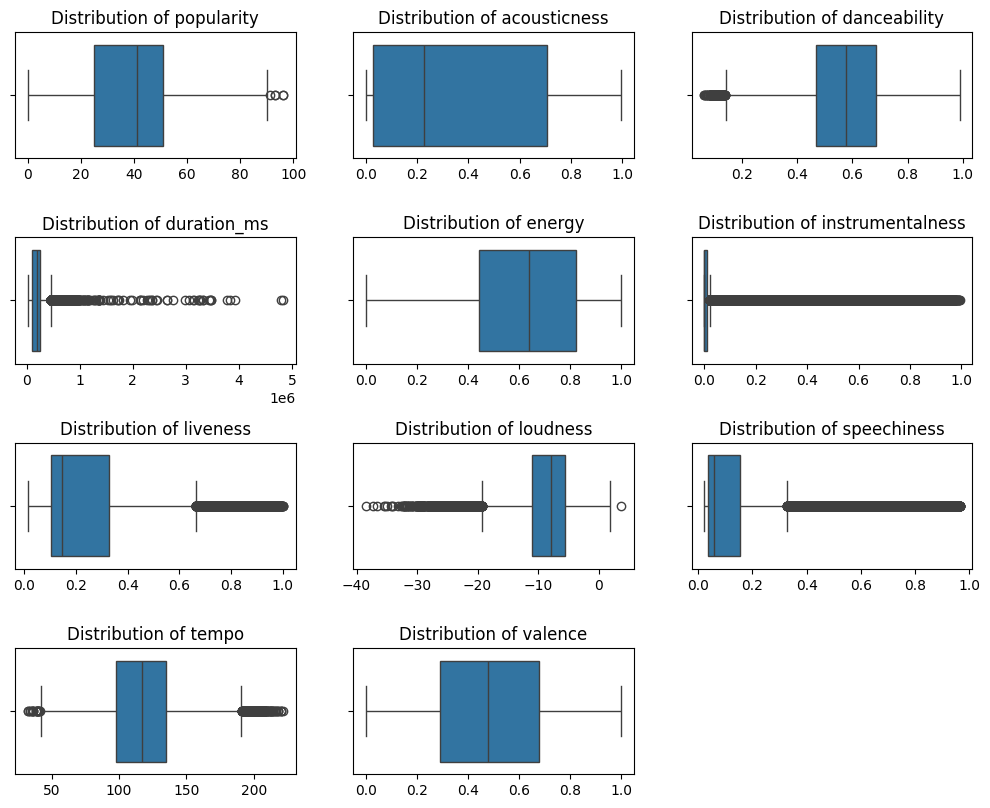

In [17]:
df_cont = merged_df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

<Axes: >

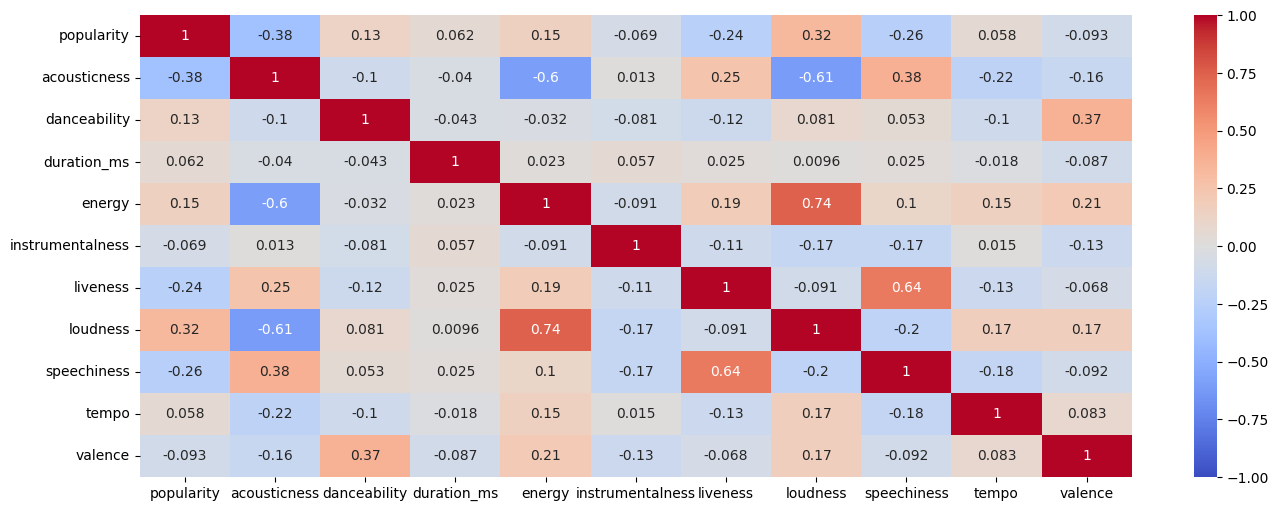

In [18]:
plt.figure(figsize=(16, 6)) # set the output figure size
sns.heatmap(data = df_cont.corr(), cmap='coolwarm', vmin = -1, vmax = 1, annot = True)

<Axes: xlabel='genre', ylabel='count'>

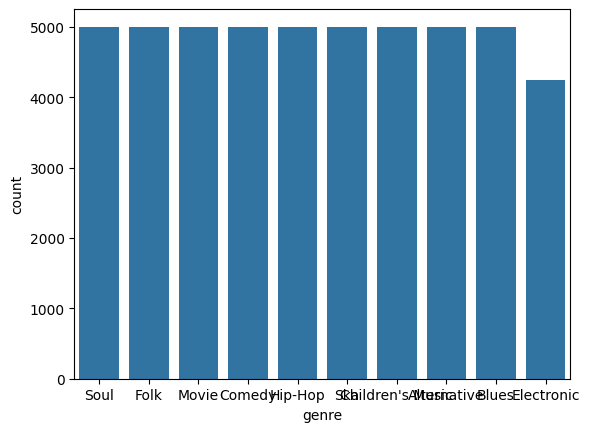

In [19]:
sns.countplot(data = merged_df, x= merged_df["genre"])

In [20]:
# Dro energy due to the very high correlation
merged_df.drop(columns=["energy"], inplace = True)

In [21]:
merged_df["duration_in_ms_trans"] = np.sqrt(merged_df["duration_ms"]) # square root transform
merged_df["loudness_trans"] = np.cbrt(merged_df["loudness"]) # cube root transform
merged_df["speechiness_trans"] = np.reciprocal(merged_df["speechiness"]) # reciprocal transform
merged_df["acousticness_trans"] = np.cbrt(merged_df["acousticness"]) # cube root transform
merged_df["instrumentalness_trans"] = np.sqrt(merged_df["instrumentalness"]) # sqrt transform
merged_df["liveness_trans"] = np.log(merged_df["liveness"]) # log transform
merged_df["tempo_trans"] = np.cbrt(merged_df["tempo"]) # cube root transform

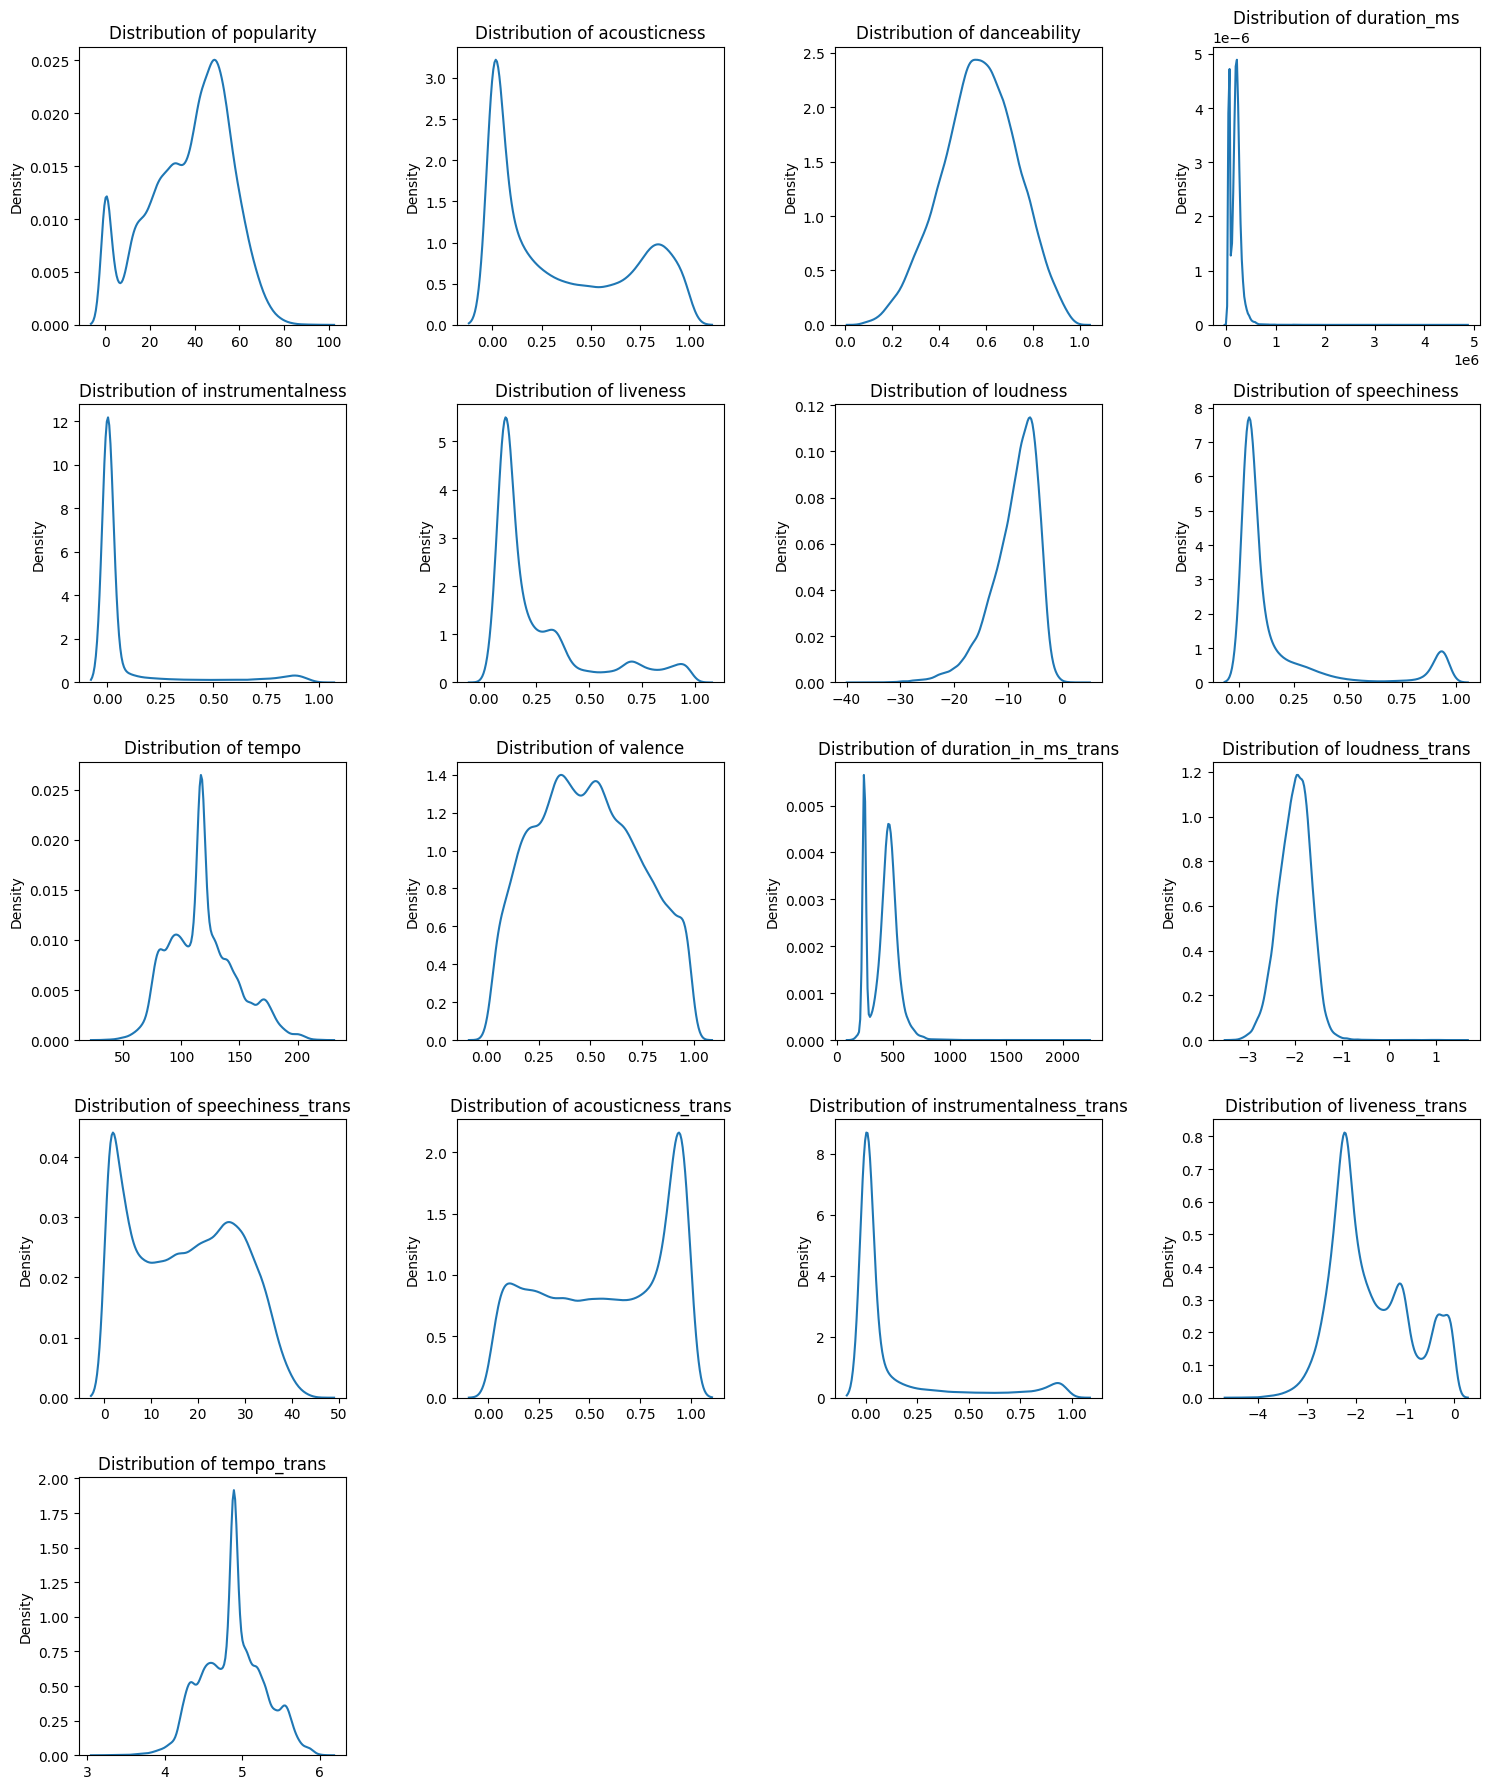

In [22]:
df_cont = merged_df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(15, 18)) # sets the size of the plot with width as 15 and height as 18
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(5,4,i) # creates 3 subplots in one single row
    sns.kdeplot(x=df_cont[columns]) # creates kde plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

In [23]:
# Drop the skeewed columns
merged_df.drop(columns = ['duration_ms','loudness','speechiness','acousticness','instrumentalness','liveness','tempo'], inplace = True)


In [24]:
merged_df.head()

,artist_name,track_name,popularity,danceability,key,mode,valence,genre,duration_in_ms_trans,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,tempo_trans
0,Broods,Bridges,57,0.405,E,Minor,0.265,Soul,244.948974,-1.854118,6.944444,0.264479,0.000000,-2.273026,5.538713
1,Maribou State,Vale,53,0.693,B,Minor,0.725,Soul,497.617323,-2.069475,23.529412,0.729363,0.878635,-1.883875,4.890736
2,The Isley Brothers,Voyage to Atlantis,45,0.560,B,Minor,0.518,Soul,519.807657,-2.228889,36.900369,0.393865,0.018111,-2.180367,4.210010
3,Warm Brew,The Mission,35,0.658,C#,Minor,0.358,Soul,571.489282,-1.833032,2.123142,0.676061,0.000000,-1.995100,5.241822
4,Ari Lennox,No One,48,0.601,A,Major,0.255,Soul,244.948974,-1.845252,5.405405,0.502653,0.255147,-3.262305,4.890736


### Now Check for outliers again

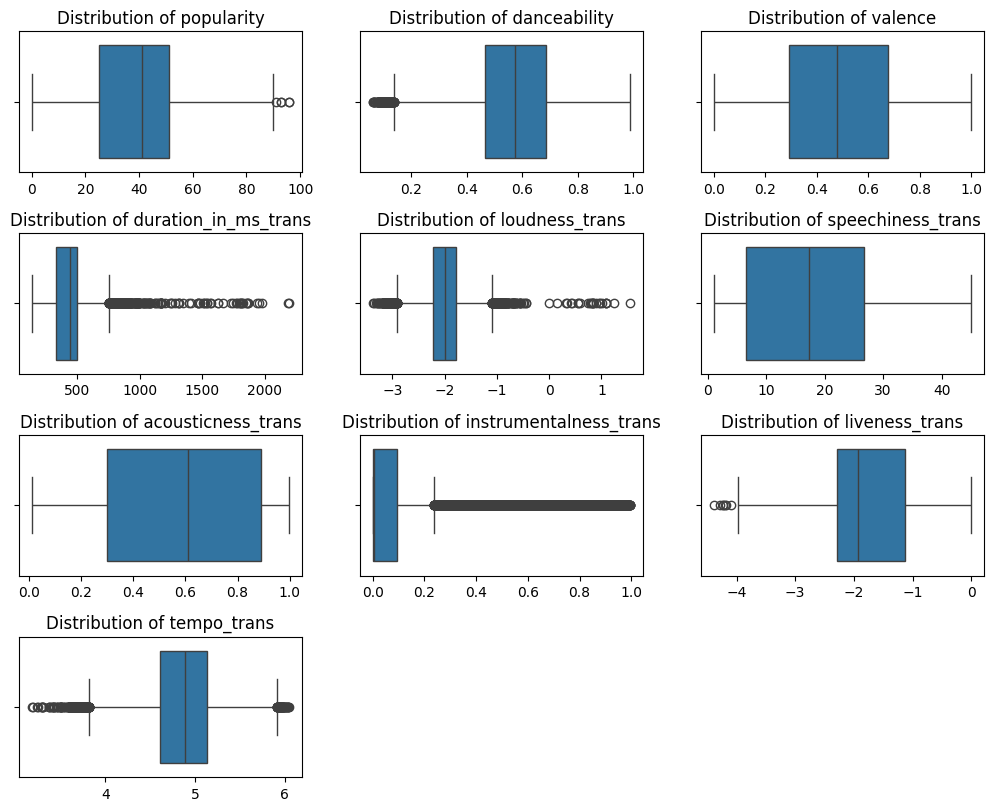

In [25]:
df_cont = merged_df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1):
    ax = plt.subplot(5,3,i) # creates 3 subplots in one single row
    sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

In [26]:
from sklearn.preprocessing import LabelEncoder
columns = ["artist_name","track_name",'mode','key']
le = LabelEncoder()
for col in columns:
  merged_df[col] = le.fit_transform(merged_df[col])
merged_df[["artist_name","track_name",'mode','key']]

,artist_name,track_name,mode,key
0,736,4974,1,7
1,3130,38326,1,2
2,4864,38605,1,2
3,5400,35434,1,4
4,303,24629,0,0
...,...,...,...,...
49241,4618,27701,1,3
49242,4728,4226,0,6
49243,3738,35185,1,0
49244,4887,24237,1,2


In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49246 entries, 0 to 49245
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   artist_name             49246 non-null  int64  
 1   track_name              49246 non-null  int64  
 2   popularity              49246 non-null  int64  
 3   danceability            49246 non-null  float64
 4   key                     49246 non-null  int64  
 5   mode                    49246 non-null  int64  
 6   valence                 49246 non-null  float64
 7   genre                   49246 non-null  object 
 8   duration_in_ms_trans    49246 non-null  float64
 9   loudness_trans          49246 non-null  float64
 10  speechiness_trans       49246 non-null  float64
 11  acousticness_trans      49246 non-null  float64
 12  instrumentalness_trans  49246 non-null  float64
 13  liveness_trans          49246 non-null  float64
 14  tempo_trans             49246 non-null

In [28]:
print(merged_df)

       artist_name  track_name  popularity  danceability  key  mode  valence  \
0              736        4974          57         0.405    7     1    0.265   
1             3130       38326          53         0.693    2     1    0.725   
2             4864       38605          45         0.560    2     1    0.518   
3             5400       35434          35         0.658    4     1    0.358   
4              303       24629          48         0.601    0     0    0.255   
...            ...         ...         ...           ...  ...   ...      ...   
49241         4618       27701          53         0.707    3     1    0.513   
49242         4728        4226          36         0.448    6     0    0.624   
49243         3738       35185          60         0.667    0     1    0.590   
49244         4887       24237          30         0.561    2     1    0.854   
49245         3118       22536          24         0.730    7     1    0.292   

            genre  duration_in_ms_trans

## Train various Models for Classification
### Neural network,SVM and XGBoost

In [29]:
cols_to_convert = ['artist_name', 'track_name', 'popularity', 'key', 'mode']
merged_df[cols_to_convert] = merged_df[cols_to_convert].astype(float)

In [30]:
# Split the data into training and testing sets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

X = merged_df.drop('genre', axis=1)  # 'genre' is the target variable
y = merged_df['genre']


PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# ## Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [31]:
print(X.shape)
print(y_encoded.shape)

(49246, 14)
(49246,)


In [32]:
# Import all libraries of models intended to be tested and the accuracy metrics
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [34]:
# Split the data into training and validation sets
# Validation sets allow us to check for overfitting in the model training
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Neural Networks

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Convert labels to NumPy arrays
y_train_encoded = np.array(y_train_encoded).astype(np.int64)
y_val_encoded = np.array(y_val_encoded).astype(np.int64)

# Convert NumPy arrays to TensorFlow tensors
y_train_encoded_tf = tf.convert_to_tensor(y_train_encoded, dtype=tf.int64)
y_val_encoded_tf = tf.convert_to_tensor(y_val_encoded, dtype=tf.int64)

# Build the neural network model
nn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='gelu'),
    Dense(64, activation='gelu'),
    Dense(32, activation='gelu'),
    Dense(len(set(y_train_encoded)), activation='softmax')  # Adjust output layer based on the number of classes
])

opt = Adam(learning_rate = 0.001)
# Compile the model
nn_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train_encoded_tf, epochs=20, batch_size=15, validation_data=(X_val, y_val_encoded_tf))

# Make predictions and evaluate accuracy on the test set
nn_predictions_probabilities = nn_model.predict(X_val)
nn_predictions = np.argmax(nn_predictions_probabilities, axis=1)
nn_accuracy = accuracy_score(y_val_encoded, nn_predictions)

# Print the accuracy
print("Neural Networks (TensorFlow/Keras) Accuracy:", nn_accuracy)

Epoch 1/20
2627/2627 [==============================] - 16s 5ms/step - loss: 1.1947 - accuracy: 0.5737 - val_loss: 1.1277 - val_accuracy: 0.5922
Epoch 2/20
2627/2627 [==============================] - 11s 4ms/step - loss: 1.0925 - accuracy: 0.6024 - val_loss: 1.1105 - val_accuracy: 0.5952
Epoch 3/20
2627/2627 [==============================] - 11s 4ms/step - loss: 1.0681 - accuracy: 0.6093 - val_loss: 1.0827 - val_accuracy: 0.6050
Epoch 4/20
2627/2627 [==============================] - 10s 4ms/step - loss: 1.0503 - accuracy: 0.6138 - val_loss: 1.0819 - val_accuracy: 0.6058
Epoch 5/20
2627/2627 [==============================] - 10s 4ms/step - loss: 1.0411 - accuracy: 0.6174 - val_loss: 1.0628 - val_accuracy: 0.6116
Epoch 6/20
2627/2627 [==============================] - 11s 4ms/step - loss: 1.0293 - accuracy: 0.6214 - val_loss: 1.0719 - val_accuracy: 0.6059
Epoch 7/20
2627/2627 [==============================] - 11s 4ms/step - loss: 1.0211 - accuracy: 0.6249 - val_loss: 1.0699 - val_ac

## Hypertuning the Neural networks

In [ ]:
def FunctionFindBestParams(X_train, y_train_encoded):

    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1

            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=128, input_dim=14, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(len(set(y_train_encoded)), kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


            survivalANN_Model=classifier.fit(X_train,y_train_encoded, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

###############################################

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train_encoded)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.6142501831054688


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.624860405921936


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.6646867990493774


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.6821250915527344


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.6140978932380676


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.6258503198623657


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.6666412949562073


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.6837242245674133


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.6106711626052856


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.6233881711959839


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.6643567681312561


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.6835973262786865


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.6120164394378662


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.6227789521217346


<ipython-input-34-30ebb81f8771>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,


- This results to overfitting on the training data as you will see in the validation data accuracy

### Visualize the classification modelling

313/313 [==============================] - 1s 2ms/step


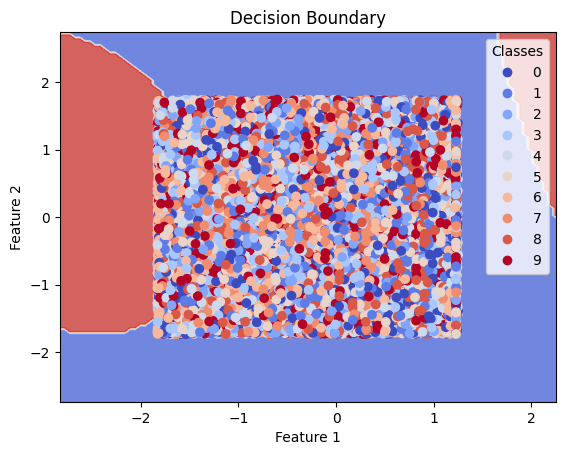

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y):
    # X has 14 features
    if X.shape[1] != 14:
        raise ValueError("The number of features in X must be 14 for this function.")

    # Create a meshgrid of X values
    min_vals = X.min(axis=0) - 1
    max_vals = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(min_vals[0], max_vals[0], 100),
                         np.linspace(min_vals[1], max_vals[1], 100))

    # Flatten and repeat the meshgrid to match the number of features
    meshgrid = np.c_[xx.ravel(), yy.ravel()]
    for i in range(2, X.shape[1]):
        meshgrid = np.c_[meshgrid, np.zeros_like(meshgrid[:, 0])]

    # Make predictions across the meshgrid
    Z = model.predict(meshgrid)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot the contour plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Scatter plot the actual data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.legend(*scatter.legend_elements(), title="Classes")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

    plt.show()

# Example usage:
# Assuming your features are in X_train (shape: [n_samples, 10]) and labels in y_train_encoded
plot_decision_boundary(nn_model, X_train, y_train_encoded)

## SVM

In [35]:
svm_model = SVC()

# Fit the pipeline to the data
svm_model.fit(X_train, y_train_encoded)
svm_predictions = svm_model.predict(X_val)
svm_accuracy = accuracy_score(y_val_encoded, svm_predictions)

# Print the accuracy
print("Support Vector Machines (SVM) Accuracy:", svm_accuracy)

Support Vector Machines (SVM) Accuracy: 0.608730964467005


Hypertuning SVC

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Grid Search
param_grid = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf'], 'svm__gamma': [0.01, 0.1, 1]}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)
best_params = grid_search.best_params

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Random Search
param_dist = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf'], 'svm__gamma': [0.01, 0.1, 1]}
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train_encoded)
best_params = random_search.best_params_

In [ ]:
best_model = grid_search.best_estimator_  # or random_search.best_estimator_
validation_predictions = best_model.predict(X_validation)
validation_accuracy = accuracy_score(y_validation, validation_predictions)

## **Train GradientBoost model for Classification:**

In [34]:
# Create and fit the Gradient Boosting (XGBoost) model
xgb_model = GradientBoostingClassifier()
xgb_model.fit(X_train, y_train_encoded)

# Make predictions and calculate accuracy
xgb_predictions = xgb_model.predict(X_val)
xgb_accuracy = accuracy_score(y_val_encoded, xgb_predictions)

# Print the accuracy
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.6371573604060914


### Hypertuning of the GradientBoost

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Create the XGBoost model
xgb_model = XGBClassifier()

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.4),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'min_child_weight': randint(1, 10),
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_dist, n_iter=10,
    cv=3, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fit the model to the data
random_search.fit(X_train, y_train_encoded)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters: {'colsample_bytree': 0.7727780074568463, 'gamma': 0.14561457009902096, 'learning_rate': 0.2547411578889518, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 157, 'subsample': 0.8056937753654446}
Best Accuracy: 0.6478576505228958


### **Train the model with the hypertuned metrics**

In [36]:
# Get the best parameters from the random search
best_params = random_search.best_params_

# Create the XGBoost model with the best parameters
best_xgb_model = XGBClassifier(**best_params)

# Fit the model to the training data
Trained_XGB = best_xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
xgb_test_predictions = Trained_XGB.predict(X_val)

# Calculate accuracy on the test set
xgb_test_accuracy = accuracy_score(y_val_encoded, xgb_test_predictions)

# Print the accuracy on the test set
print("XGBoost Test Accuracy:", xgb_test_accuracy)


XGBoost Test Accuracy: 0.6571573604060914


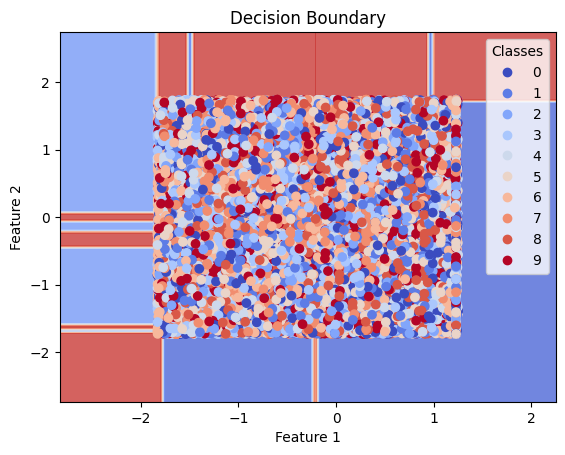

In [38]:
def plot_decision_boundary(model, X, y):
    # X has 14 features
    if X.shape[1] != 14:
        raise ValueError("The number of features in X must be 14 for this function.")

    # Create a meshgrid of X values
    min_vals = X.min(axis=0) - 1
    max_vals = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(min_vals[0], max_vals[0], 100),
                         np.linspace(min_vals[1], max_vals[1], 100))

    # Flatten and repeat the meshgrid to match the number of features
    meshgrid = np.c_[xx.ravel(), yy.ravel()]
    for i in range(2, X.shape[1]):
        meshgrid = np.c_[meshgrid, np.zeros_like(meshgrid[:, 0])]

    # Make predictions across the meshgrid
    Z = model.predict_proba(meshgrid)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot the contour plot
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Scatter plot the actual data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.legend(*scatter.legend_elements(), title="Classes")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

    plt.show()

# Example usage:
# Assuming your features are in X_train (shape: [n_samples, 10]) and labels in y_train_encoded
plot_decision_boundary(Trained_XGB, X_train, y_train_encoded)

# **Classification using Trained XGBoost model on Test data**
## Load the data

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test_data/test.csv")
test_df

,instance_id,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,Tsuruda,Brrrap!!,2ESzaP7ZoabnJA3TTG71Ul,41,0.255000,0.699,218733,0.949,0.256000,F#,0.0983,-4.110,Minor,0.3890,146.064,4-Apr,0.365
1,2,Aretha Franklin,Soul Serenade,18sDWMHFfgDOh1zMrFJt1C,38,0.364000,0.649,159067,0.296,0.000008,G#,0.1320,-9.389,Major,0.0334,81.911,4-Apr,0.600
2,3,Asiahn,Curiosity,7itEG38P49CQ3miMcoYzJe,55,0.445000,0.457,234802,0.425,0.000000,E,0.0714,-10.500,Minor,0.2430,201.472,4-Apr,0.498
3,4,Dora The Explorer,Ni Hao My Friends,4yK3xXuNrkSq0OVjKUaCkY,7,0.332000,0.756,78760,0.543,0.000000,G#,0.3330,-5.477,Major,0.0279,88.98,4-Apr,0.839
4,5,Matthew West,"Hello, My Name Is",7GxBuIJugWanLsYj0mDrFX,54,0.000583,0.595,223427,0.894,0.000001,B,0.3260,-4.115,Major,0.0323,101.987,4-Apr,0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30926,30927,Kimbo Children's Music,The Royal Ball,33pgY0vezKpyTEU5MYQDZk,0,0.367000,0.609,205840,0.498,0.000000,G,0.0756,-7.197,Major,0.0546,189.823,3-Apr,0.664
30927,30928,Interpol,Obstacle 1,0xjdytIAHKrjsdHoLDkq4p,59,0.000052,0.377,251333,0.937,0.578000,F,0.0676,-4.898,Major,0.0649,120.532,4-Apr,0.375
30928,30929,Iron & Wine,Lion's Mane,69pwmeyvQMuHMtkCmpEWhQ,43,0.884000,0.603,-1,0.346,0.916000,G,0.1040,-11.481,Major,0.0303,88.45,4-Apr,0.619
30929,30930,Wardruna,Helvegen,4qZh3yJ7tILlDD0Wmv7Ftj,57,0.657000,0.234,431867,0.510,0.293000,F,0.5450,-13.398,Minor,0.0498,?,4-Apr,0.191


## Pre-processing the test data

In [ ]:
# convert all column names to lowercase
test_df.columns= test_df.columns.str.replace(" ","_").str.lower()
print("Column names after conversion = ", test_df.columns)

Column names after conversion =  Index(['instance_id', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [ ]:
# convert all -1 values to 1 minute
duration_condition = test_df['duration_ms'] < 1
test_df.loc[duration_condition,'duration_ms'] = test_df.loc[duration_condition,'duration_ms']*(-60000)

In [ ]:
# Check for duplicates and delete them
test_duplicateRows = test_df[test_df.duplicated(subset = test_df.columns.difference(['class']))]
print("Shape of dataset before removing duplicate rows =", test_df.shape)
test_df.drop_duplicates(subset = test_df.columns.difference(['class']), inplace = True, ignore_index = True)
print("Shape of dataset after removing duplicate rows =", test_df.shape)


Shape of dataset before removing duplicate rows = (30931, 18)
Shape of dataset after removing duplicate rows = (30931, 18)


In [ ]:
# Check  for Nan values in the columns
nan_col = test_df.columns[test_df.isnull().any()]
for i in nan_col:
    print(i, test_df[i].isnull().sum())

In [ ]:
# Encode all string columns
from sklearn.preprocessing import LabelEncoder
columns = ["artist_name","track_name",'mode','key']
le = LabelEncoder()
for col in columns:
  test_df[col] = le.fit_transform(test_df[col])

In [ ]:
# Replace '?' with NaN in column 'x'
test_df['tempo'] = test_df['tempo'].replace('?', pd.NA)
# Convert the column to a numeric type
test_df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')

In [ ]:
# Check  for Nan values in the columns just to be sure
nan_col = test_df.columns[test_df.isnull().any()]
for i in nan_col:
    print(i, test_df[i].isnull().sum())

tempo 4598


In [ ]:
## Imputing null values in "tempo" columns with the median value of respective columns
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
test_df[['tempo']] = imp.fit_transform(test_df[['tempo']])

In [ ]:
# unskeewing the data
test_df["duration_in_ms_trans"] = np.sqrt(test_df["duration_ms"]) # square root transform
test_df["loudness_trans"] = np.cbrt(test_df["loudness"]) # cube root transform
test_df["speechiness_trans"] = np.reciprocal(test_df["speechiness"]) # reciprocal transform
test_df["acousticness_trans"] = np.cbrt(test_df["acousticness"]) # cube root transform
test_df["instrumentalness_trans"] = np.sqrt(test_df["instrumentalness"]) # sqrt transform
test_df["liveness_trans"] = np.log(test_df["liveness"]) # log transform
test_df["tempo_trans"] = np.cbrt(test_df["tempo"]) # cube root transform

In [ ]:
# Drop original skewed coloumns + any unnecesary coloumns
test_df.drop(columns = ['track_id','duration_ms','loudness','speechiness','acousticness','energy','instrumentalness','liveness','tempo','time_signature'], inplace = True)

In [ ]:
test_df.head()

,instance_id,artist_name,track_name,popularity,danceability,key,mode,valence,duration_in_ms_trans,loudness_trans,speechiness_trans,acousticness_trans,instrumentalness_trans,liveness_trans,tempo_trans
0,1,314.0,34124.0,34.0,0.699,0.0,1.0,0.365,467.688999,-1.601821,2.570694,0.634133,0.505964,-2.319731,5.266407
1,2,1451.0,15258.0,24.0,0.649,10.0,0.0,0.600,398.832045,-2.109631,29.940120,0.714004,0.002786,-2.024953,4.342909
2,3,395.0,14725.0,34.0,0.457,0.0,1.0,0.498,484.563721,-2.189760,4.115226,0.763461,0.000000,-2.639457,5.862348
3,4,395.0,3570.0,48.0,0.756,10.0,0.0,0.839,280.642121,-1.762710,35.842294,0.692436,0.000000,-1.099613,4.464411
4,5,5244.0,22773.0,57.0,0.595,4.0,0.0,0.643,472.680653,-1.602470,30.959752,0.083539,0.001114,-1.120858,4.672130


In [ ]:
# Convert all int columns to foat dtype
cols_to_convert = ['artist_name', 'track_name', 'popularity', 'key', 'mode']
test_df[cols_to_convert] = merged_df[cols_to_convert].astype(float)

In [ ]:
# Remove the instance_Id column and standardize the rest in preparation for classification
column_to_retain = test_df['instance_id']
X_new_data = test_df.drop('instance_id', axis=1)

PredictorScalerFit=PredictorScaler.fit(X_new_data)

# Generating the standardized values of X and y
X_new_data =PredictorScalerFit.transform(X_new_data)


## Classify the test data

In [ ]:
# Call the trained model and classify the new data
Test_Classified = Trained_XGB.predict(X_new_data)

In [ ]:
# Convert the Numpy array to a dataframe and re-insert the instance_id
classified_data = pd.DataFrame({
    'genre': Test_Classified,
    'Instance_id': column_to_retain
})

In [ ]:
# Inverse transform the predicted labels to get the original class labels and save the file to a csv
classified_data['genre'] = label_encoder.inverse_transform(classified_data['genre'])
classified_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Classified_test_data.csv', index=False)

In [ ]:
classified_data.head()

,genre,Instance_id
0,Electronic,1
1,Movie,2
2,Ska,3
3,Soul,4
4,Children's Music,5
